## Aluno: 

### usando o arquivo house_prices.csv, responda as questões abaixo

## 1) leia o arquivo, trate os valores faltantes e remova duplicatas

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
from datetime import datetime
import random
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [91]:
# resposta 1
dados = pd.read_csv('house_prices.csv', sep=';')
dados.head()

,tamanho,n_quartos,idade,preco
0,2104.0,3.0,45.0,399900
1,2104.0,3.0,45.0,399900
2,1600.0,3.0,30.0,329900
3,2400.0,3.0,32.0,369000
4,1416.0,2.0,10.0,232000


## 2) Há outliers no data set? Se sim, trate-os de forma adequada

In [92]:
# resposta 2
dados.isna().sum()

tamanho      1
n_quartos    1
idade        2
preco        0
dtype: int64

In [93]:
dados['tamanho'] = dados['tamanho'].fillna(dados['tamanho'].mean())
dados['n_quartos'] = dados['n_quartos'].fillna(int(dados['n_quartos'].mean()))
dados['idade'] = dados['idade'].fillna(int(dados['idade'].mean()))
dados.isna().sum()

tamanho      0
n_quartos    0
idade        0
preco        0
dtype: int64

In [94]:
def plotar_box_plot(data):   
    fig = plt.figure()
    ax1 = fig.add_subplot(2, 2, 1)
    ax2 = fig.add_subplot(2, 2, 2)
    ax3 = fig.add_subplot(2, 2, 3)
    ax1.boxplot(data['tamanho'])
    ax2.boxplot(data['n_quartos'])
    ax3.boxplot(data['idade'])

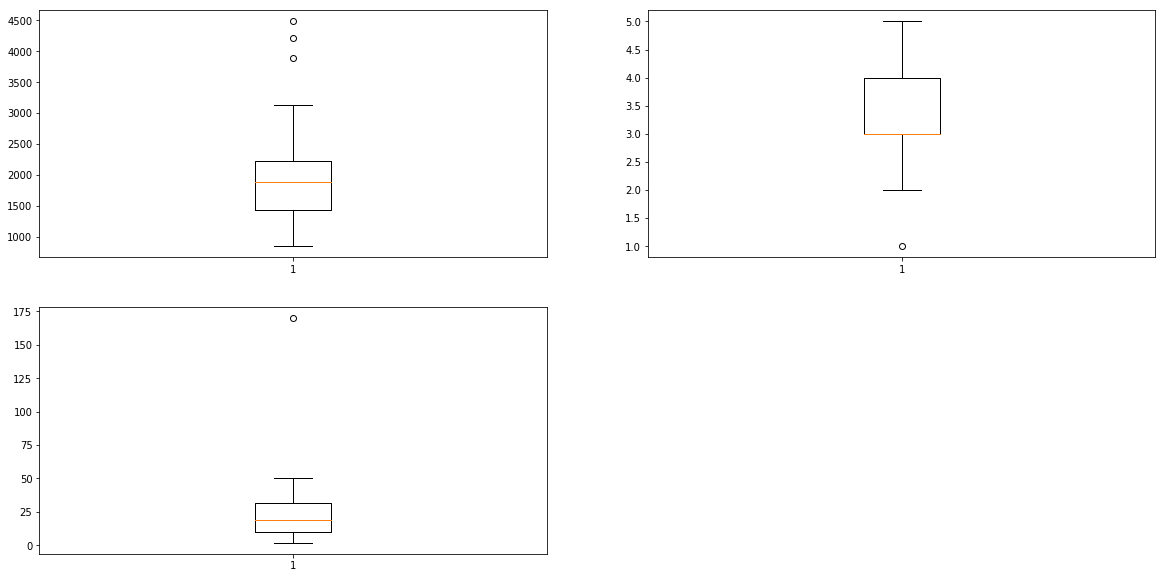

In [95]:
plotar_box_plot(dados)

In [96]:
dados = dados.drop(dados[dados['tamanho'] > 3500].index)
dados = dados.drop(dados[dados['n_quartos'] < 1.5].index)
dados = dados.drop(dados[dados['idade'] > 150].index)

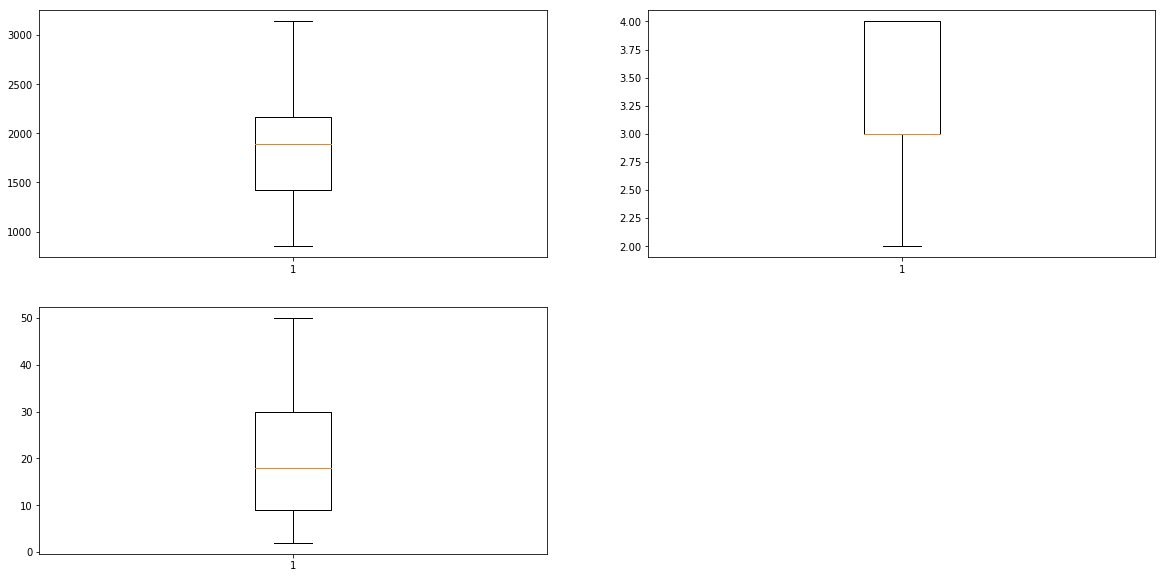

In [97]:
plotar_box_plot(dados)

## 3) insira uma coluna, denominada 'n_andares', com valores no intervalo [1,2], preenchidos de forma aleatória

In [106]:
valores = [ random.randint(1,2) for x in range(0, len(dados)) ]
dados['n_andares'] = valores

In [107]:
dados['n_andares'].describe()

count    45.000000
mean      1.422222
std       0.499495
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       2.000000
Name: n_andares, dtype: float64

## 4) para cada variável, plote um scatter e verifique sua relação com a variável meta (preco)

In [167]:
def plotar_scatter(data):   
    fig = plt.figure()
    ax1 = fig.add_subplot(2, 2, 1)
    ax2 = fig.add_subplot(2, 2, 2)
    ax3 = fig.add_subplot(2, 2, 3)
    ax4 = fig.add_subplot(2, 2, 4)
    ax1.scatter(data['tamanho'], data['preco'])
    ax2.scatter(data['n_quartos'], data['preco'])
    ax3.scatter(data['idade'], data['preco'])
    ax4.scatter(data['n_andares'], data['preco'])

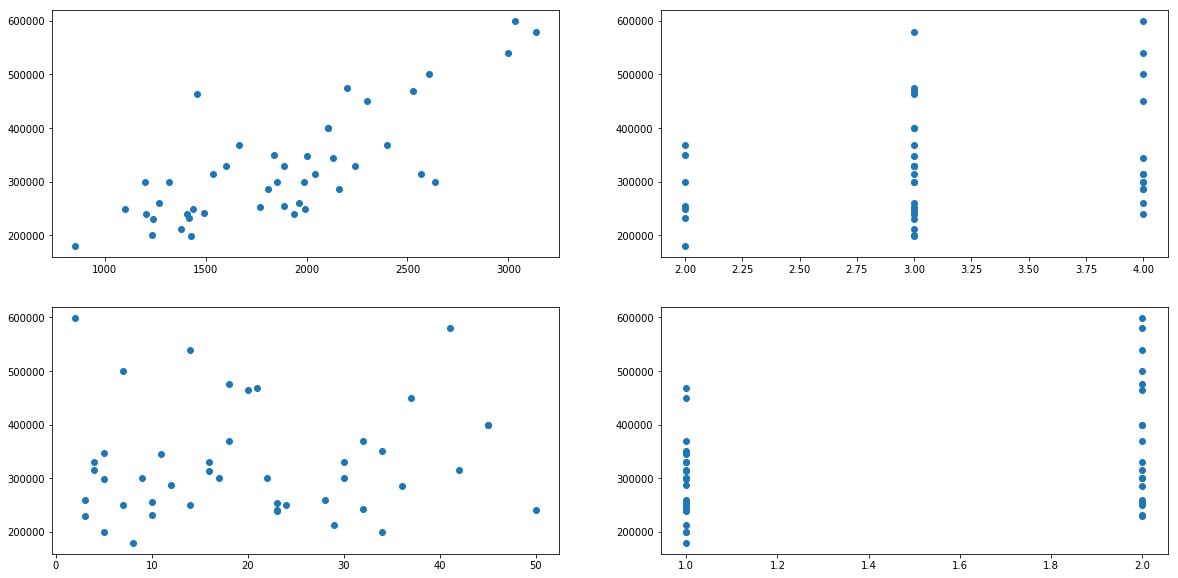

In [168]:
plotar_scatter(dados)

A variável tamanho é a que aparenta ter maior correlação com a variável meta

## 5) Separe o dataset em conjuntos de treino e teste, na proporção 70/30

In [212]:
feature_col = ['tamanho','n_quartos','idade', 'n_andares']
meta_col = ['preco']

X = dados[feature_col].values
y = dados[meta_col].values
split_test_size = 0.30

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

## 6) Utilizando a Scikit Learn, ajuste uma regressão linear aos dados e mostre o MSE da etapa de treinamento

In [214]:
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train.ravel()) # flatten arrays

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [215]:
y_pred = lr_model.predict(X_train)
y_pred

array([201709.41265369, 354834.89958526, 163012.40742075, 349576.84076863,
       229623.11819703, 288465.89945808, 322248.05400689, 543707.08127276,
       400569.45622052, 394390.59326981, 367829.31092228, 314300.55192164,
       499574.36663684, 300895.13522905, 286246.59763015, 394390.59326981,
       382399.01587161, 369180.55250813, 261958.67484664, 256248.4606073 ,
       290513.20463629, 317589.00325078, 247096.25015719, 231967.30432269,
       440595.49783495, 202105.8111218 , 284261.33387936, 244828.75101899,
       267699.6729354 , 413014.13069697, 338864.01784872])

In [216]:
mean_squared_error(y_train,y_pred)

2569135606.8859315

## 7) Prediga o valor da variável meta para cada amostra do conjunto de teste. Qual o MSE? 

In [217]:
# resposta 7
y_pred = lr_model.predict(X_test)
y_pred

array([347377.48864544, 293063.56969808, 394243.53935017, 279982.41106786,
       330615.64223169, 196465.44311597, 300426.28523585, 312998.09950967,
       237914.79246692, 379069.48352305, 350278.17813057, 187391.30775247,
       332737.38118147, 500621.09337586])

In [218]:
mean_squared_error(y_test,y_pred)

5605905843.109465